# Rain in Australia

#### This kernel predicts whether it will rain tomorrow.

#### I'm a newbie in ML,if you like it, please upvote :)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#Showing full path of datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

#Disable warnings
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Import Dataset

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

## Head

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Shape

In [4]:
#Number of rows and columns in our dataset
df.shape

(142193, 24)

## Columns

In [5]:
#The 24 columns 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

#### Drop Risk_MM column

In [6]:
#As mentioned in the dataset description , 
#we should exclude the variable Risk-MM when training a binary classification model.
#Not excluding it will leak the answers to your model and reduce its predictability.

df.drop(['RISK_MM'],axis=1,inplace=True)

## Info

In [7]:
#Basic Information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
#Before looking at the description of the data
#We can see that there are few columns with very less data
#Evaporation,Sunshine,Cloud9am,Cloud3pm
#It is better to remove these four columns as it will affect our prediction even if we
#fill the na values...

#Date and Location is also not required
#As we are predicting rain in australia and not when and where in australia


drop_cols = ['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date','Location']

df.drop(columns=drop_cols,inplace=True,axis=1)

#### Data after dropping columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   WindGustDir    132863 non-null  object 
 4   WindGustSpeed  132923 non-null  float64
 5   WindDir9am     132180 non-null  object 
 6   WindDir3pm     138415 non-null  object 
 7   WindSpeed9am   140845 non-null  float64
 8   WindSpeed3pm   139563 non-null  float64
 9   Humidity9am    140419 non-null  float64
 10  Humidity3pm    138583 non-null  float64
 11  Pressure9am    128179 non-null  float64
 12  Pressure3pm    128212 non-null  float64
 13  Temp9am        141289 non-null  float64
 14  Temp3pm        139467 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(5)
mem

In [10]:
#Basic description of our data
#Numerical features first
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


* The count is different for all the features
* We can see difference in mean and max is huge in many features.

In [11]:
#Including Categorical features with include object
df.describe(include='object')

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,132863,132180,138415,140787,142193
unique,16,16,16,2,2
top,W,N,SE,No,No
freq,9780,11393,10663,109332,110316


* Here too there are null values in our categorical data

In [14]:
#Now including all the features
df.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,141556.000000,141871.000000,140787.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,140787,142193
unique,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,12.186400,23.226784,2.349974,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,NaN,NaN
std,6.403283,7.117618,8.465173,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,NaN,NaN
min,-8.500000,-4.800000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,NaN,NaN
25%,7.600000,17.900000,0.000000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,NaN,NaN
50%,12.000000,22.600000,0.000000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,NaN,NaN
75%,16.800000,28.200000,0.800000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,NaN,NaN


## Null Values

In [15]:
#Our dataset consists of 142193 rows and the count for many features is less than 142193.
#This shows presence of Null values.
#Let's look at the null values..

df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

* Except Date,Location and our target feature,
* All the other features have null values
* We'll deal with these later in the notebook..

## Skewness

In [17]:
df.skew()

MinTemp          0.023900
MaxTemp          0.224917
Rainfall         9.888061
WindGustSpeed    0.874305
WindSpeed9am     0.775494
WindSpeed3pm     0.631433
Humidity9am     -0.482821
Humidity3pm      0.034515
Pressure9am     -0.096211
Pressure3pm     -0.046198
Temp9am          0.091387
Temp3pm          0.240054
dtype: float64

* The features with skewness values near zero may follow gaussian distribution.
* Rainfall is strongly right skewed (9.88)
* We'll have a look at the distributions for further clarity.

In [18]:
#Filling missing values

#We can see that there are outliers in our data
#So the best way to fill the na values in our numerical features is with median
#Because median deals the best with outliers

#Let's separate numerical and categorical
#data type of numerical features is equal to float64
#With the help of following list comprehension we separate the numerical features...

num = [col for col in df.columns if df[col].dtype=="float64"]

for col in num:
    df[col].fillna(df[col].median(),inplace=True)
    
cat = [col for col in df.columns if df[col].dtype=="O"]
for col in cat:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [19]:
#Check missing values
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

* There are no missing values present now and we can start our analysis.

# Correlation

In [20]:
df.corr().style.background_gradient(cmap="Reds")

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.733894,0.103205,0.172719,0.175126,0.174226,-0.232714,0.006051,-0.424056,-0.433704,0.898129,0.699170
MaxTemp,0.733894,1.000000,-0.073862,0.066930,0.014805,0.050309,-0.500179,-0.499633,-0.308861,-0.397168,0.880255,0.969297
Rainfall,0.103205,-0.073862,1.000000,0.126684,0.085595,0.056578,0.221110,0.249128,-0.159586,-0.120331,0.011333,-0.077464
WindGustSpeed,0.172719,0.066930,0.126684,1.000000,0.579196,0.659084,-0.210104,-0.027178,-0.426647,-0.384828,0.146615,0.032827
WindSpeed9am,0.175126,0.014805,0.085595,0.579196,1.000000,0.512932,-0.269041,-0.031182,-0.214929,-0.164775,0.128765,0.005479
WindSpeed3pm,0.174226,0.050309,0.056578,0.659084,0.512932,1.000000,-0.144260,0.015735,-0.277125,-0.239319,0.162190,0.028526
Humidity9am,-0.232714,-0.500179,0.221110,-0.210104,-0.269041,-0.144260,1.000000,0.660071,0.131517,0.176081,-0.471274,-0.492952
Humidity3pm,0.006051,-0.499633,0.249128,-0.027178,-0.031182,0.015735,0.660071,1.000000,-0.025913,0.048394,-0.217547,-0.555784
Pressure9am,-0.424056,-0.308861,-0.159586,-0.426647,-0.214929,-0.277125,0.131517,-0.025913,1.000000,0.959879,-0.397508,-0.265802
Pressure3pm,-0.433704,-0.397168,-0.120331,-0.384828,-0.164775,-0.239319,0.176081,0.048394,0.959879,1.000000,-0.441867,-0.360698


# Heatmap

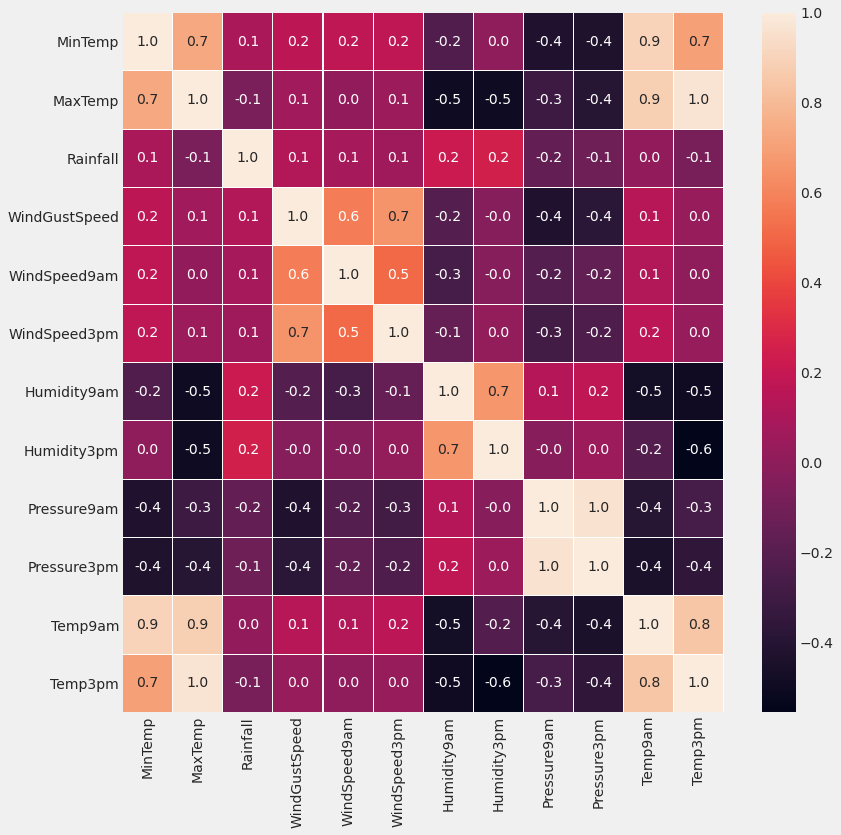

In [21]:
#With the use of heatmap
corr = df.corr()

fig = plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,fmt=".1f",linewidths="0.1")

**Correlated features**

* MinTemp -- MaxTemp (0.7)
* MinTemp -- Temp3pm (0.7)
* MaxTemp -- Temp9am (0.9)
* WindGustSpeed -- WindSpeed9am (0.6)
* WindGustSpeed -- WindSpeed3pm (0.7)
* Humidity9am -- Humidity3pm (0.7)
* Humidity3pm -- Temp3pm (-0.6)
* Temp9am -- MinTemp (0.9)
* Temp9am -- Temp3pm

**Features that are less correlated with other features**

* Rainfall
* Pressure9am
* Pressure3pm

* Later we'll have a look at the scatterplots of these correlated features.....

## Study the numerical features

In [23]:
print("Numerical features :: {}\n".format(num))
print("No of Numerical features :: {}".format(len(num)))

Numerical features :: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

No of Numerical features :: 12


# Distributions of each numerical feature

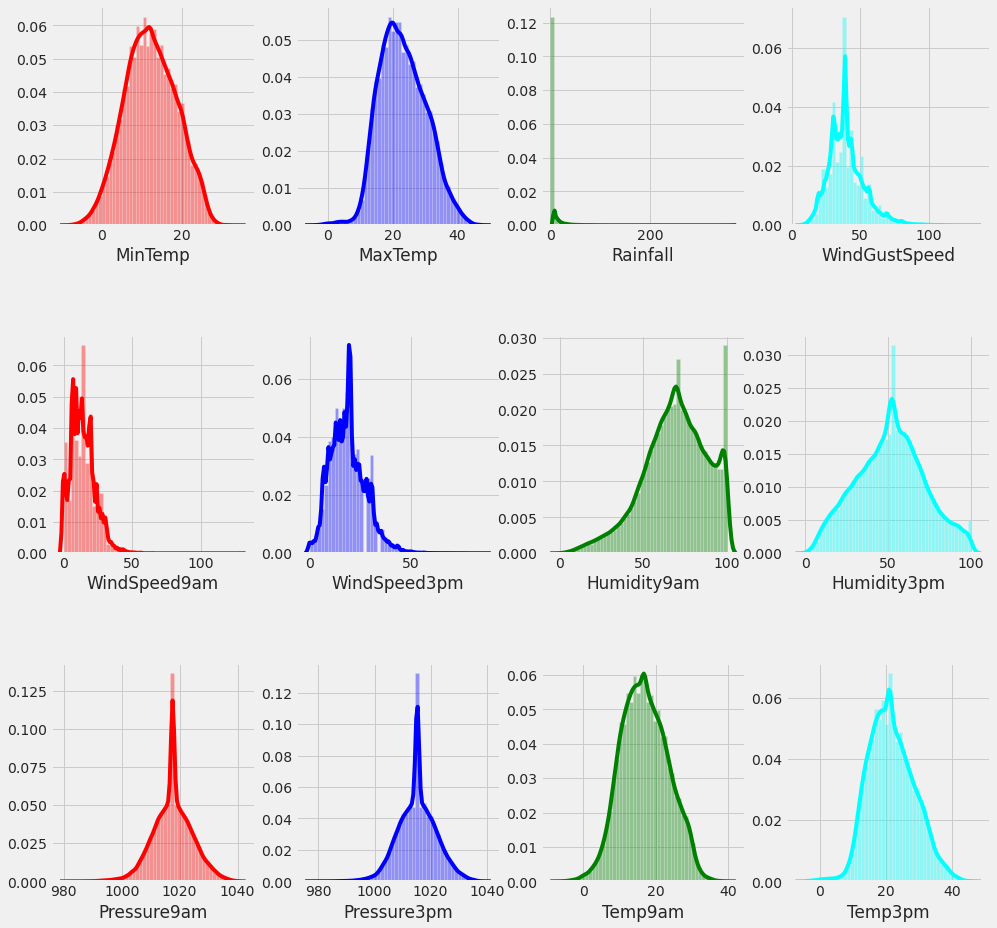

In [24]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

i=1
colors = ['Red','Blue','Green','Cyan',
         'Red','Blue','Green','Cyan',
         'Red','Blue','Green','Cyan']
j=0
for col in num:
    plt.subplot(3,4,i)
    a1 = sns.distplot(df[col],color=colors[j])
    i+=1
    j+=1

* Rainfall and Evaporation as seen with skewness value (9.88) and (3.74) are right skewed as seen above.
* Cloud9am and Cloud3pm behave as categorical features.

# Boxplot

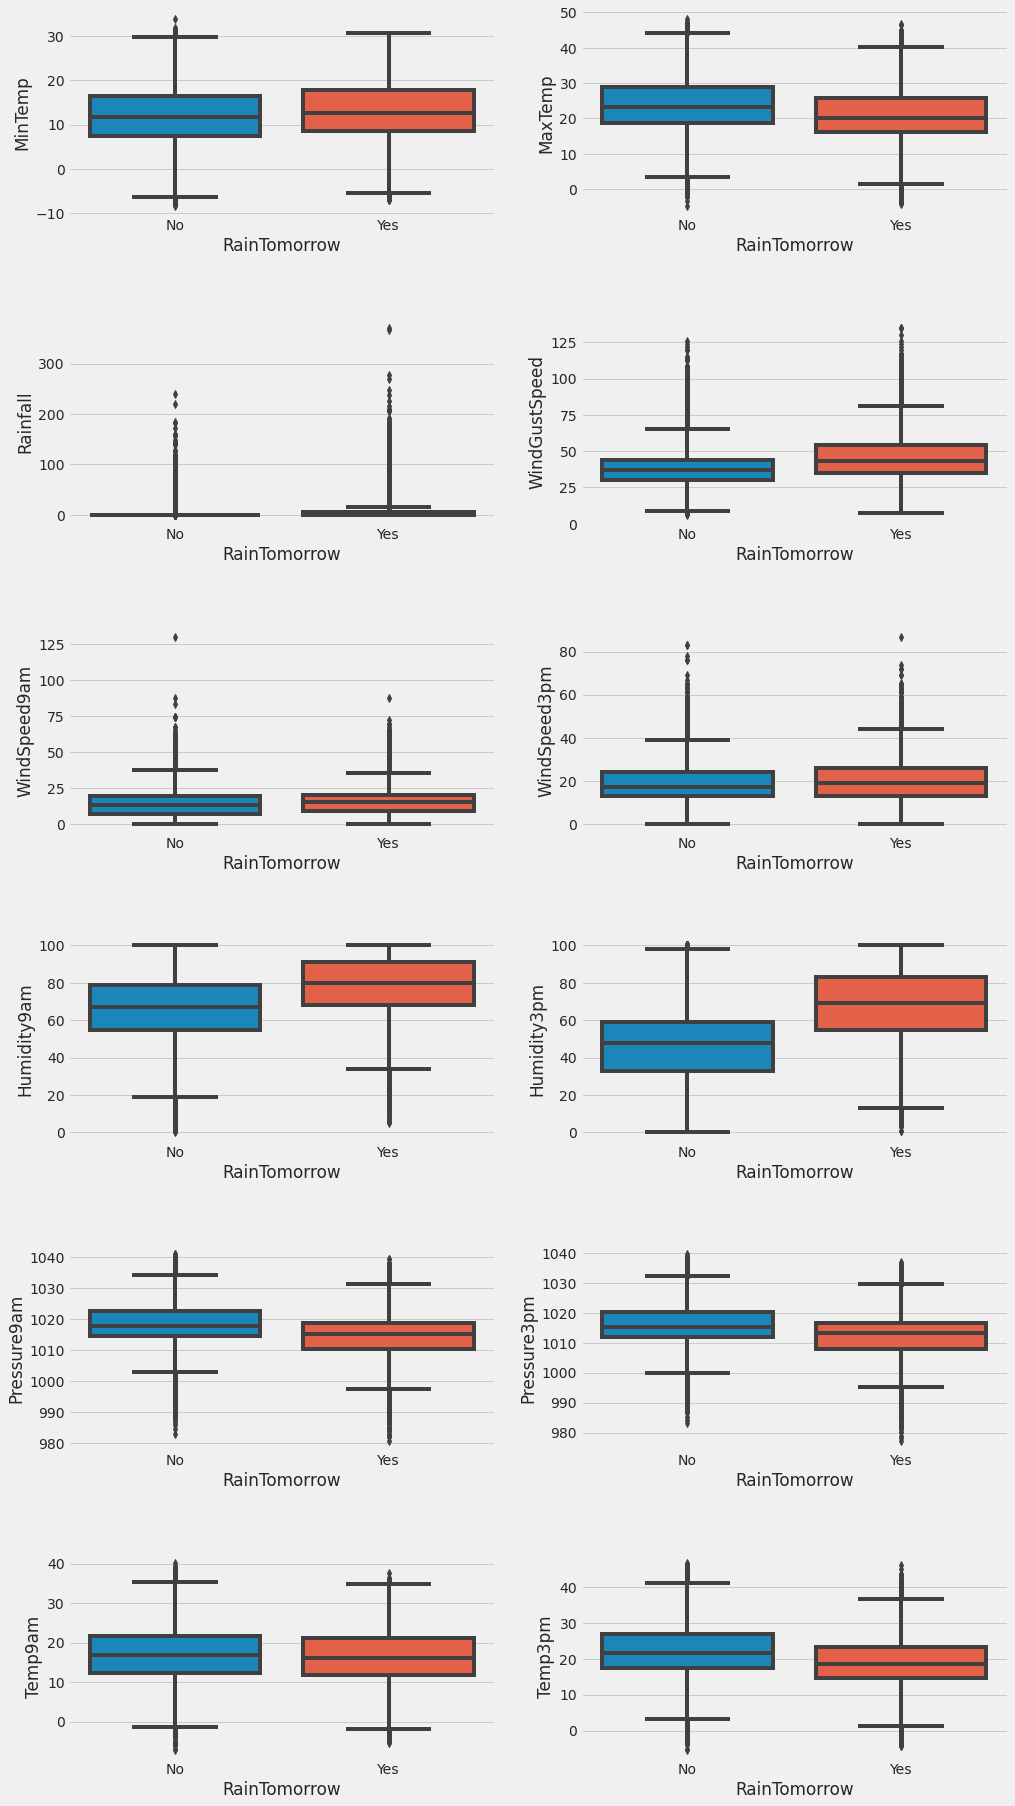

In [25]:
plt.figure(figsize=(15,30))
plt.subplots_adjust(hspace=0.5)

i=1
for col in num:
    plt.subplot(6,2,i)
    a1 = sns.boxplot(data=df,x="RainTomorrow",y=col)
    i+=1

**With the help of skewness values and above box plots,Rainfall,WindGustSpeed,WindSpeed9am and WindSpeed3pm**
**may contain outliers**

# Find the outliers

In [27]:
#Create a loop that finds the outliers in train and test  and removes it
features_to_examine = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm']

for col in features_to_examine:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25) 
    Lower_Bound = df[col].quantile(0.25) - (IQR*3)
    Upper_Bound = df[col].quantile(0.75) + (IQR*3)
    
    print("The outliers in {} feature are values <<< {} and >>> {}".format(col,Lower_Bound,Upper_Bound))
    
    minimum = df[col].min()
    maximum = df[col].max()
    print("The minimum value in {} is {} and maximum value is {}".format(col,minimum,maximum))
    
    if maximum>Upper_Bound:
          print("The outliers for {} are value greater than {}\n".format(col,Upper_Bound))
    elif minimum<Lower_Bound:
          print("The outliers for {} are value smaller than {}\n".format(col,Lower_Bound))

The outliers in Rainfall feature are values <<< -1.7999999999999998 and >>> 2.4
The minimum value in Rainfall is 0.0 and maximum value is 371.0
The outliers for Rainfall are value greater than 2.4

The outliers in WindGustSpeed feature are values <<< -14.0 and >>> 91.0
The minimum value in WindGustSpeed is 6.0 and maximum value is 135.0
The outliers for WindGustSpeed are value greater than 91.0

The outliers in WindSpeed9am feature are values <<< -29.0 and >>> 55.0
The minimum value in WindSpeed9am is 0.0 and maximum value is 130.0
The outliers for WindSpeed9am are value greater than 55.0

The outliers in WindSpeed3pm feature are values <<< -20.0 and >>> 57.0
The minimum value in WindSpeed3pm is 0.0 and maximum value is 87.0
The outliers for WindSpeed3pm are value greater than 57.0



# Barplots

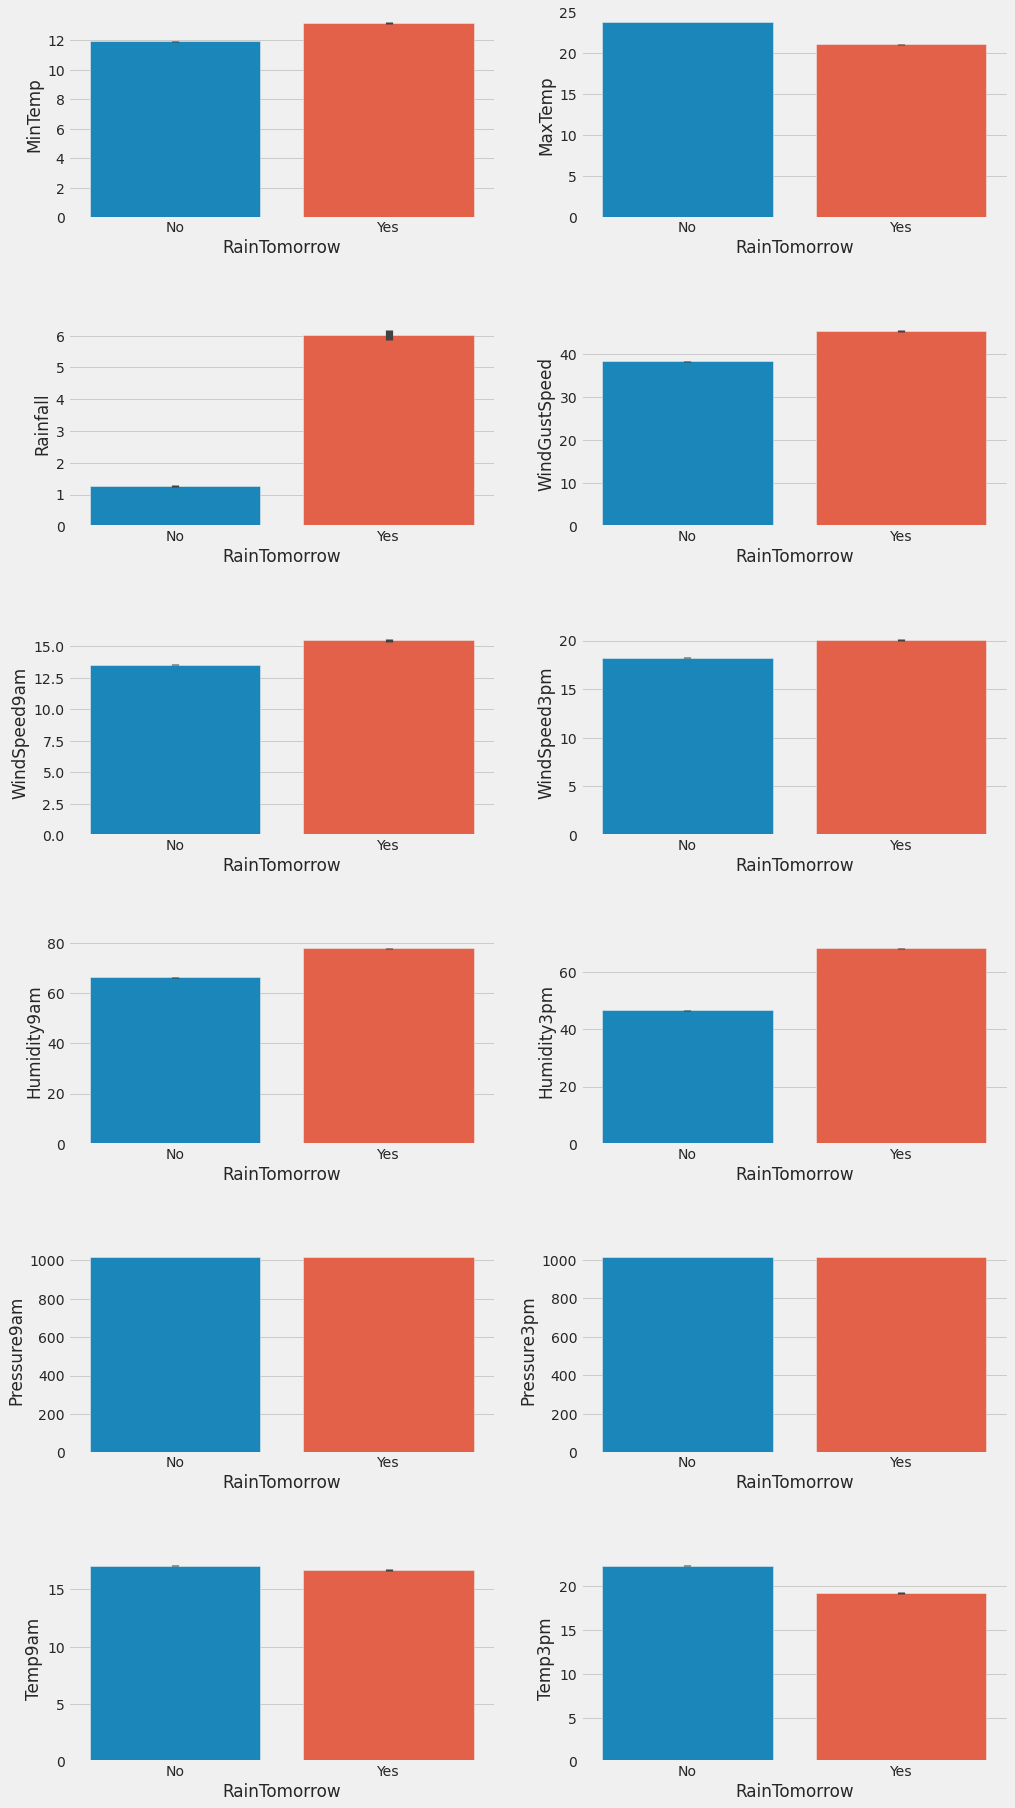

In [28]:
plt.figure(figsize=(15,30))
plt.subplots_adjust(hspace=0.5)

i=1
for col in num:
    plt.subplot(6,2,i)
    a1 = sns.barplot(data=df,x="RainTomorrow",y=col)
    i+=1

**Now let's have a look at the correlated variables from the above histogram**

# Scatterplots

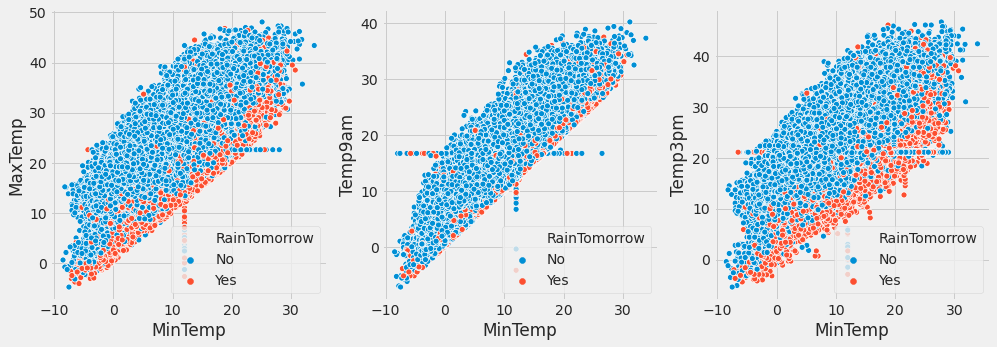

In [29]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.5)

i=1
features_list = ["MaxTemp","Temp9am","Temp3pm"]
for feature in features_list:
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x="MinTemp",y=feature,hue="RainTomorrow")
    i+=1

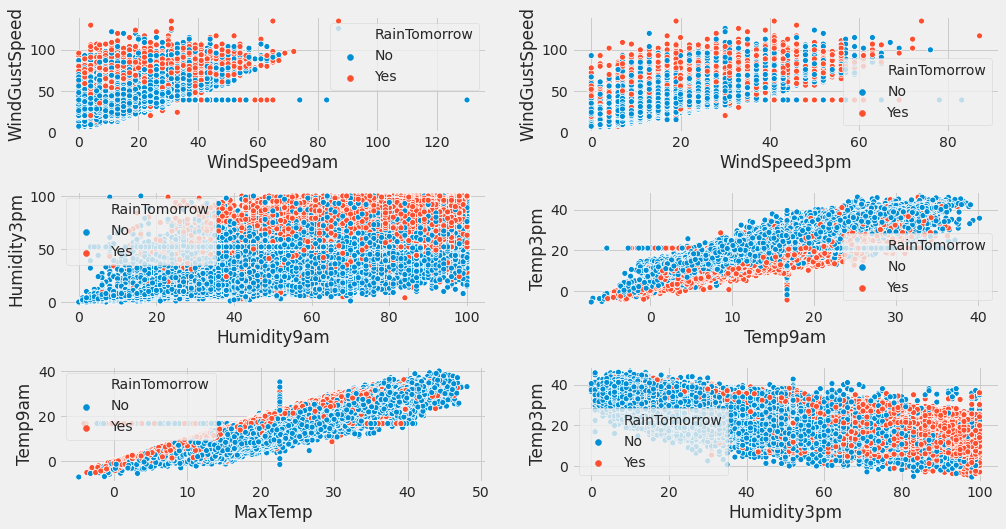

In [30]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,2,1)
sns.scatterplot(data=df,x="WindSpeed9am",y="WindGustSpeed",hue="RainTomorrow")

plt.subplot(3,2,2)
sns.scatterplot(data=df,x="WindSpeed3pm",y="WindGustSpeed",hue="RainTomorrow")

plt.subplot(3,2,3)
sns.scatterplot(data=df,x="Humidity9am",y="Humidity3pm",hue="RainTomorrow")

plt.subplot(3,2,4)
sns.scatterplot(data=df,x="Temp9am",y="Temp3pm",hue="RainTomorrow")

plt.subplot(3,2,5)
sns.scatterplot(data=df,x="MaxTemp",y="Temp9am",hue="RainTomorrow")

plt.subplot(3,2,6)
sns.scatterplot(data=df,x="Humidity3pm",y="Temp3pm",hue="RainTomorrow")

# Categorical Features

In [31]:
cat

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

### WindGustDir

In [32]:
df['WindGustDir'].value_counts()

W      19110
SE      9309
E       9071
N       9033
SSE     8993
S       8949
WSW     8901
SW      8797
SSW     8610
WNW     8066
NW      8003
ENE     7992
ESE     7305
NE      7060
NNW     6561
NNE     6433
Name: WindGustDir, dtype: int64

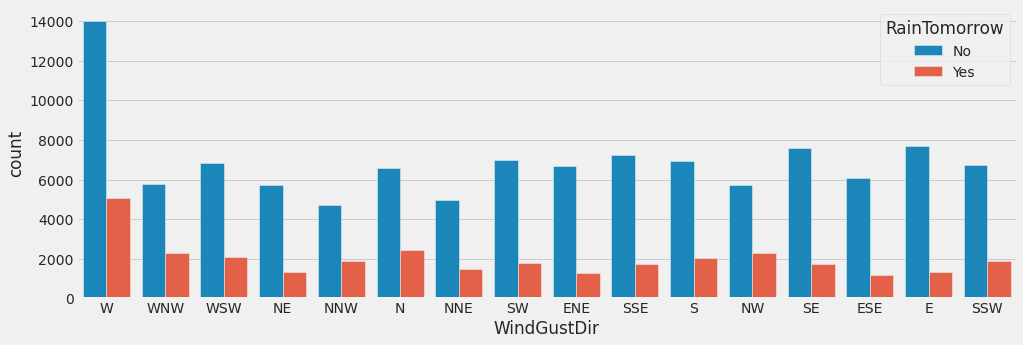

In [34]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data=df,x="WindGustDir",hue="RainTomorrow");

### WindDir9am

In [35]:
df['WindDir9am'].value_counts()

N      21406
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

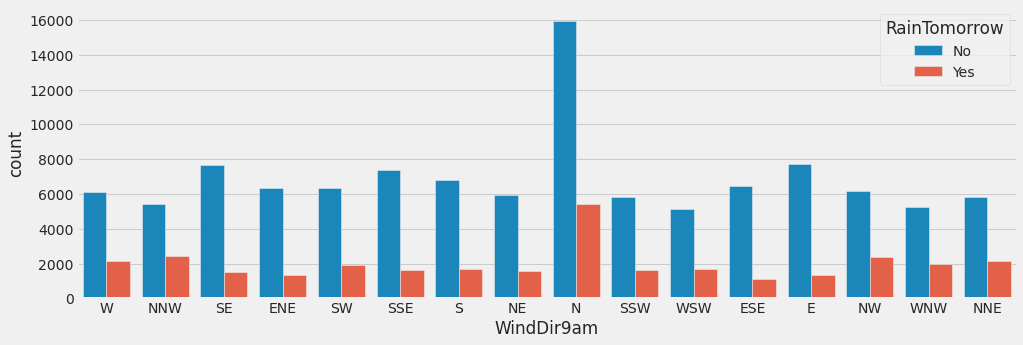

In [36]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data=df,x="WindDir9am",hue="RainTomorrow");

### WindDir3pm

In [37]:
df['WindDir3pm'].value_counts()

SE     14441
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

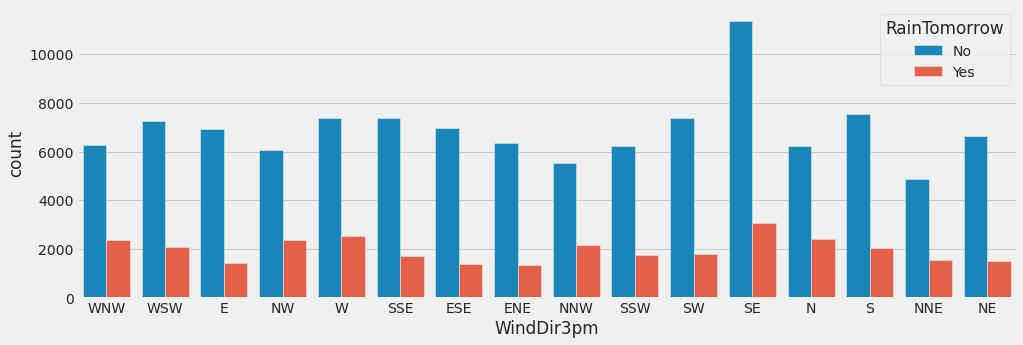

In [38]:
fig = plt.figure(figsize=(15,5))
sns.countplot(data=df,x="WindDir3pm",hue="RainTomorrow");

## Target Feature

In [39]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

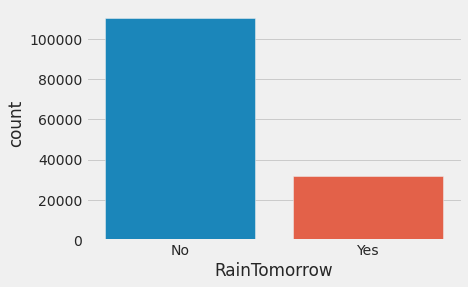

In [40]:
sns.countplot(data=df,x="RainTomorrow")

#### Splitting the data into **training** and **testing** sets

In [41]:
from sklearn.model_selection import train_test_split as tts
y=df[['RainTomorrow']]
X=df.drop(['RainTomorrow'],axis=1)

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=0)

In [42]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
95444,13.0,21.0,14.0,W,31.0,NNE,SW,6.0,17.0,89.0,70.0,1017.9,1018.1,15.2,19.6,Yes
27932,19.5,22.8,24.6,SSW,35.0,NNE,SE,13.0,0.0,99.0,83.0,1009.2,1009.1,20.3,22.3,Yes
15097,21.0,33.4,0.0,W,39.0,NW,NW,4.0,19.0,26.0,17.0,1017.6,1015.2,26.9,32.0,No
94607,10.3,19.8,4.8,NW,54.0,N,NW,9.0,20.0,78.0,50.0,1000.4,998.6,12.5,18.3,Yes
99888,15.5,25.3,0.2,WSW,31.0,NNW,SW,4.0,20.0,80.0,77.0,1012.5,1012.7,19.6,21.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,9.4,17.6,0.0,SSW,35.0,ENE,E,7.0,17.0,62.0,80.0,1022.2,1019.9,16.3,16.2,No
97639,1.2,20.2,0.0,N,33.0,NE,NW,13.0,13.0,69.0,33.0,1022.0,1017.9,11.2,19.7,No
95939,11.9,17.6,1.2,WSW,39.0,SW,WSW,13.0,20.0,67.0,38.0,1022.2,1022.8,14.5,17.1,Yes
117952,7.7,26.0,0.0,SSE,31.0,SE,SE,11.0,13.0,58.0,25.0,1025.5,1023.0,14.4,24.6,No


In [43]:
X_test

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
86232,17.4,29.0,0.0,NNE,33.0,SE,NNE,11.0,19.0,63.0,61.0,1013.1,1008.9,26.1,27.8,No
57576,6.8,14.4,0.8,S,46.0,SW,S,17.0,22.0,80.0,55.0,1010.2,1012.4,10.4,12.7,No
124071,10.1,15.4,14.6,WSW,31.0,SW,SSE,13.0,9.0,70.0,61.0,1014.4,1016.1,12.3,13.0,Yes
117955,14.4,33.4,0.0,SW,41.0,ESE,SW,9.0,17.0,40.0,23.0,1019.2,1016.6,23.0,32.3,No
133468,6.8,14.3,10.0,E,28.0,ENE,ESE,15.0,13.0,92.0,47.0,1027.6,1024.4,7.3,13.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72589,12.8,32.5,0.4,W,43.0,S,WNW,4.0,24.0,75.0,32.0,1011.7,1008.8,20.4,30.7,No
80399,7.5,19.4,1.2,SW,37.0,W,SW,9.0,19.0,92.0,57.0,1019.0,1019.2,11.9,18.3,Yes
74611,8.2,13.7,1.6,S,28.0,SSE,S,11.0,13.0,66.0,68.0,1027.4,1026.9,11.9,13.2,Yes
38044,11.5,25.1,0.0,NE,26.0,E,E,15.0,15.0,72.0,37.0,1021.8,1018.9,15.7,24.3,No


# Feature Engineering

#### First we will remove any outliers present in our data

#### We have found the outliers in Rainfall,WindGustSpeed,WindSpeed9am and WindSpeed3pm.
**We Will cap these outliers now**


**Let's have a look at their histograms.**

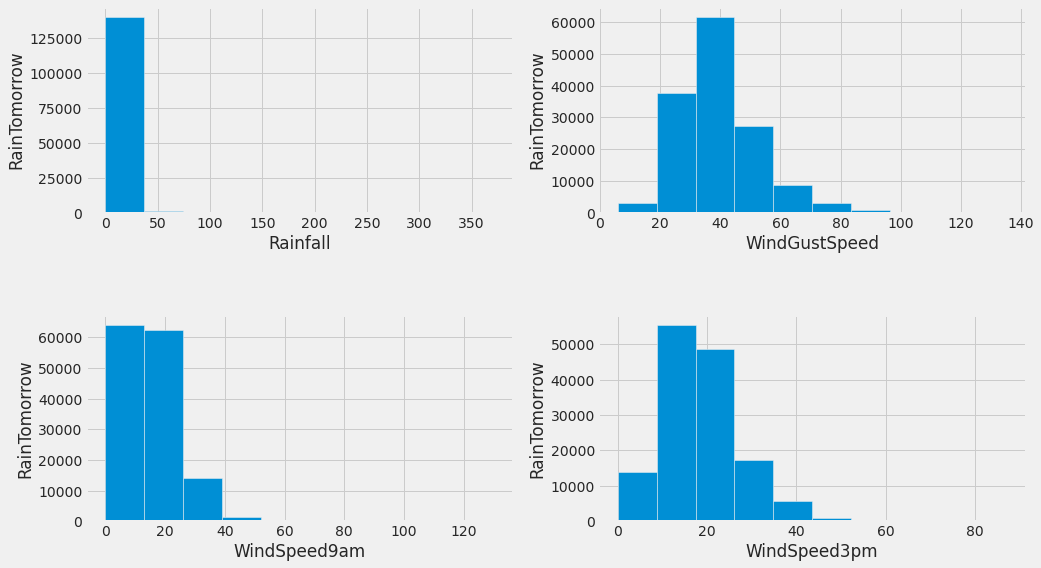

In [44]:
#We'll plot these four as subplots 

plt.figure(figsize=(15,30))
plt.subplots_adjust(hspace=0.5)

features_to_examine = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
i=1
for col in features_to_examine:
    plt.subplot(6,2,i)
    fig = df[col].hist(bins=10)
    fig.set_xlabel(col)
    fig.set_ylabel('RainTomorrow')
    i+=1

**We can clearly see right skewed histograms in all the four**

***We'll try to cap these outliers that will help us in predictions later.***

In [45]:
def remove_outliers(df,col,Lower_Bound,Upper_Bound):    
    minimum = df[col].min()
    maximum = df[col].max()
    
    if maximum>Upper_Bound:
        return np.where(df[col]>Upper_Bound,Upper_Bound,df[col])
          
    elif minimum<Lower_Bound:
        return np.where(df[col]<Lower_Bound,Lower_Bound,df[col])

In [46]:
for df1 in [X_train,X_test]:
    df1['Rainfall'] = remove_outliers(df1,'Rainfall',-1.799,2.4)
    df1['WindGustSpeed'] = remove_outliers(df1,'WindGustSpeed',-14.0,91.0)
    df1['WindSpeed9am'] = remove_outliers(df1,'WindSpeed9am',-29.0,55.0)
    df1['WindSpeed3pm'] = remove_outliers(df1,'WindSpeed3pm',-20.0,57.0)

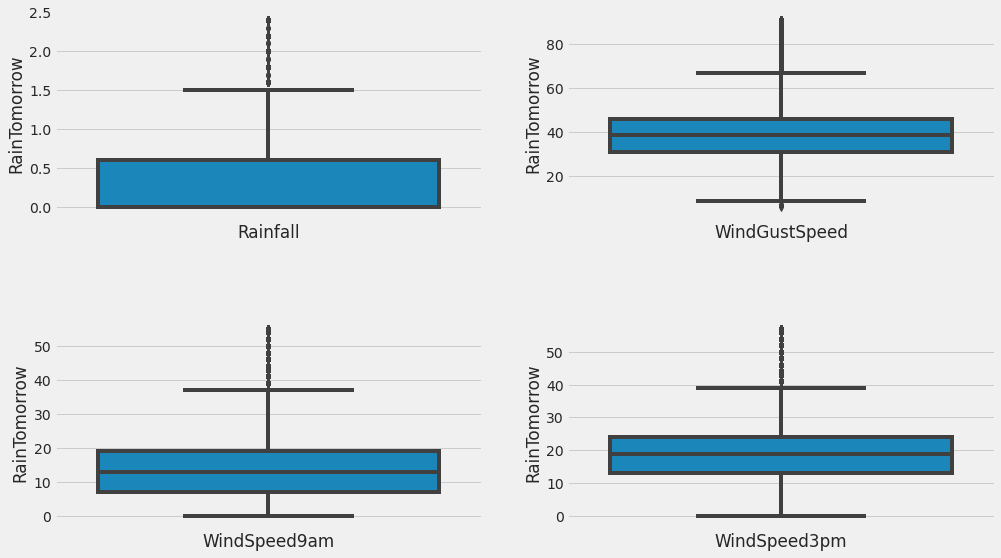

In [47]:
#If we look at their boxplots we can see that the outliers are now capped...
plt.figure(figsize=(15,30))
plt.subplots_adjust(hspace=0.5)

features_to_examine = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
i=1
for col in features_to_examine:
    plt.subplot(6,2,i)
    fig = sns.boxplot(data=X_train,y=col)
    fig.set_xlabel(col)
    fig.set_ylabel('RainTomorrow')
    i+=1

In [48]:
#Describe helps us understand more about the mean and max values

X_train[features_to_examine].describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,99535.000000,99535.000000,99535.000000,99535.000000
mean,0.549865,39.848867,13.976812,18.603687
std,0.925578,13.005850,8.802965,8.678162
min,0.000000,6.000000,0.000000,0.000000
25%,0.000000,31.000000,7.000000,13.000000
50%,0.000000,39.000000,13.000000,19.000000
75%,0.600000,46.000000,19.000000,24.000000
max,2.400000,91.000000,55.000000,57.000000


In [49]:
X_test[features_to_examine].describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,42658.000000,42658.000000,42658.000000,42658.000000
mean,0.551974,40.007736,14.014206,18.725866
std,0.926566,13.101546,8.878856,8.755812
min,0.000000,7.000000,0.000000,0.000000
25%,0.000000,31.000000,7.000000,13.000000
50%,0.000000,39.000000,13.000000,19.000000
75%,0.600000,46.000000,19.000000,24.000000
max,2.400000,91.000000,55.000000,57.000000


# Encode categorical variables

In [50]:
#Our next step is to encode all the categorical variables.
#first we will convert our target variable

for df2 in [y_train,y_test]:
    df2['RainTomorrow'] = df2['RainTomorrow'].replace({"Yes":1,
                                                    "No":0})



Encode **RainToday** variable

In [51]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
#Now we will make our training dataset

X_train = pd.concat([X_train[num],X_train[['RainToday_0','RainToday_1']],
                    pd.get_dummies(X_train['WindGustDir']),
                    pd.get_dummies(X_train['WindDir9am']),
                    pd.get_dummies(X_train['WindDir3pm'])],axis=1)


In [53]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
95444,13.0,21.0,2.4,31.0,6.0,17.0,89.0,70.0,1017.9,1018.1,...,0,0,0,0,0,0,1,0,0,0
27932,19.5,22.8,2.4,35.0,13.0,0.0,99.0,83.0,1009.2,1009.1,...,0,0,0,1,0,0,0,0,0,0
15097,21.0,33.4,0.0,39.0,4.0,19.0,26.0,17.0,1017.6,1015.2,...,0,1,0,0,0,0,0,0,0,0
94607,10.3,19.8,2.4,54.0,9.0,20.0,78.0,50.0,1000.4,998.6,...,0,1,0,0,0,0,0,0,0,0
99888,15.5,25.3,0.2,31.0,4.0,20.0,80.0,77.0,1012.5,1012.7,...,0,0,0,0,0,0,1,0,0,0


In [54]:
#Same for testing set

X_test = pd.concat([X_test[num],X_test[['RainToday_0','RainToday_1']],
                    pd.get_dummies(X_test['WindGustDir']),
                    pd.get_dummies(X_test['WindDir9am']),
                    pd.get_dummies(X_test['WindDir3pm'])],axis=1)

In [55]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,33.0,11.0,19.0,63.0,61.0,1013.1,1008.9,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,46.0,17.0,22.0,80.0,55.0,1010.2,1012.4,...,0,0,1,0,0,0,0,0,0,0
124071,10.1,15.4,2.4,31.0,13.0,9.0,70.0,61.0,1014.4,1016.1,...,0,0,0,0,1,0,0,0,0,0
117955,14.4,33.4,0.0,41.0,9.0,17.0,40.0,23.0,1019.2,1016.6,...,0,0,0,0,0,0,1,0,0,0
133468,6.8,14.3,2.4,28.0,15.0,13.0,92.0,47.0,1027.6,1024.4,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [56]:
#our training and testing set is ready for our model
#But ,before that we need to bring all the features to same scale with feature scaling
#For this we will use MinMaxScaler
#As there our negative values in our dataset and MinMaxScaler scales our data in range -1 to 1.

cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [57]:
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

**Finally ,after removing outliers,encoding the categorical variables and scaling**

**Our training and testing sets are ready**

# Model Training

# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#Prediction on Xtest

y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
#using predict_proba gives the probability value for the target feature

logreg.predict_proba(X_test)

array([[0.82558291, 0.17441709],
       [0.79295269, 0.20704731],
       [0.77426331, 0.22573669],
       ...,
       [0.8746862 , 0.1253138 ],
       [0.98337858, 0.01662142],
       [0.9495072 , 0.0504928 ]])

In [61]:
#probability of getting no rain (0)

logreg.predict_proba(X_test)[:,0]

array([0.82558291, 0.79295269, 0.77426331, ..., 0.8746862 , 0.98337858,
       0.9495072 ])

In [62]:
#probability of getting rain (1)

logreg.predict_proba(X_test)[:,1]

array([0.17441709, 0.20704731, 0.22573669, ..., 0.1253138 , 0.01662142,
       0.0504928 ])

In [63]:
#Check accuracy with accuracy_score

from sklearn.metrics import accuracy_score

predict_test = accuracy_score(y_test,y_pred_test)

print("Accuracy of model on test set :: {}".format(predict_test))

Accuracy of model on test set :: 0.8406863894228516


In [64]:
#Creating confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[31308  1728]
 [ 5068  4554]]


### The result is telling us that we have 31308+4554 correct predictions and 5068+1728 incorrect predictions.

**35,862 correct predictions.**

**6796 Incorrect predictions.**

In [65]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33036
           1       0.72      0.47      0.57      9622

    accuracy                           0.84     42658
   macro avg       0.79      0.71      0.74     42658
weighted avg       0.83      0.84      0.83     42658



In [66]:
#Comparing train and test accuracy

y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 1])

In [67]:
#Check accuracy of our model with train set

predict_train = accuracy_score(y_train,y_pred_train)
print("Accuracy of our model on train set :: {}".format(predict_train))

Accuracy of our model on train set :: 0.8400060280303411


### We can see somewhat same score for both out training and testing datasets using this model

In [68]:
#Overall Accuracy

print("Accuracy of our model :: {}".format(logreg.score(X_test,y_test)))

Accuracy of our model :: 0.8406863894228516


### 84% accuracy is good but we can still improve it

In [69]:
#Let's try to improve the accuracy of our model

#Let's try different C values

#Now what is C

#### C is inverse of regularization strength.

#### Higher values of C correspond to less regularization

#### By default , C is equal to 1

* Now let's reduce the regularization strength

In [71]:
#C=100

# instantiate the model
logreg100 = LogisticRegression(solver='liblinear',C=100, random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

#Prediction on Xtest

y_pred_test = logreg100.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
predict_test = accuracy_score(y_test,y_pred_test)

print("Accuracy of model on test set :: {}".format(predict_test))

Accuracy of model on test set :: 0.8407801584696891


In [73]:
#Overall Accuracy

print("Accuracy of our model :: {}".format(logreg100.score(X_test,y_test)))

Accuracy of our model :: 0.8407801584696891


In [74]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

[[31292  1744]
 [ 5048  4574]]


**35,886 Correct predictions**

**6,792 Incorrect predictions**

#### We can see increase in correct predictions and decrease in incorrect predictions

In [75]:
#Classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     33036
           1       0.72      0.48      0.57      9622

    accuracy                           0.84     42658
   macro avg       0.79      0.71      0.74     42658
weighted avg       0.83      0.84      0.83     42658



#### We can see a slight increase in our model with C=100

In [76]:
#Let's increase the regularization strength

#C=0.01

# instantiate the model
logreg001 = LogisticRegression(solver='liblinear',C=0.01, random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

#Prediction on Xtest

y_pred_test = logreg001.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
predict_test = accuracy_score(y_test,y_pred_test)

print("Accuracy of model on test set :: {}".format(predict_test))

Accuracy of model on test set :: 0.8369590698110554


In [78]:
#Overall Accuracy

print("Accuracy of our model :: {}".format(logreg001.score(X_test,y_test)))

Accuracy of our model :: 0.8369590698110554


#### We can see a decrease in our model accuracy with C=0.01

## Our aim is to predict whether it will rain or not tomorrow in australia.

#### Let's see the probability of raining with the help of histogram

In [79]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg100.predict_proba(X_test)[:, 1]
y_pred0 = logreg100.predict_proba(X_test)[:, 0]

Text(0, 0.5, 'Frequency')

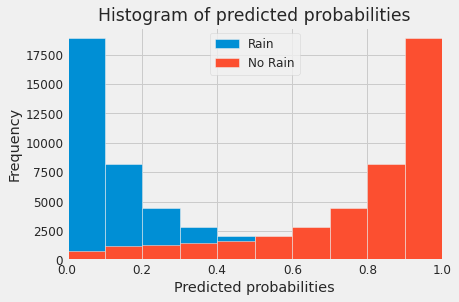

In [80]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
plt.hist(y_pred0, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities')


# set the x-axis limit
plt.xlim(0,1)

#Set legend
plt.legend('upper left' , labels = ['Rain','No Rain'])

# set the title
plt.xlabel('Predicted probabilities')
plt.ylabel('Frequency')

* The above histogram is highly right skewed for rain
* Highly left skewed for no rain 
* There is less chance that it will rain tomorrow as most of the predicted probabilities are near to zero.
* Higher chance as probabilities are close to 1.


Conclusion :-
    
    * Our model predicts that there's a higher chance of not raining tomorrow in australia as seen in the above histogram.
    
    * Accuracy of our model is 84%.

### PLEASE GIVE A UPVOTE IF YOU LIKE THIS KERNEL :)